<a href="https://colab.research.google.com/github/danielgraviet/CS-180-Data-Science/blob/main/labs/05_cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/labs/05-cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 5: Cereal Data

## Introduction:


Everyone loves cereal. But have you ever thought deeply about your cereal? Well now is your chance to take a data driven view of your breakfast.

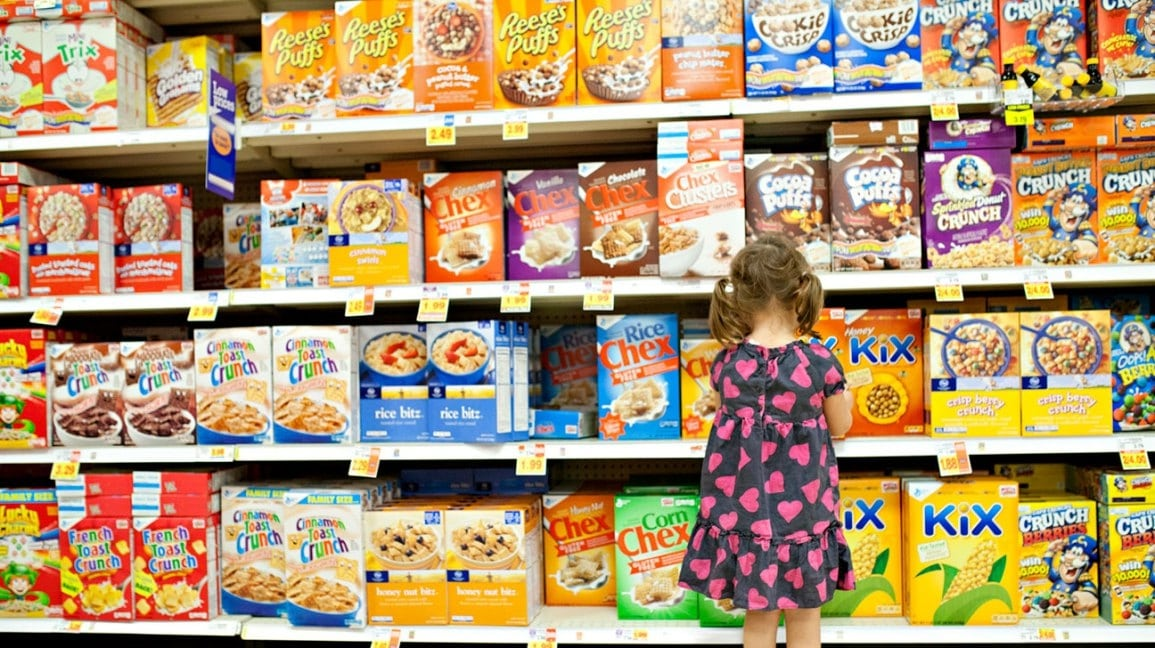


### Getting Started:
Download the data from github. Run the code below to download the data that you'll be using in this lab.

You may use pandas, numpy, matplotlib and/or seaborn for these excercises.

You can use/read their respective documentation in the links below (only if you need too, it's not required for the lab):

*   Seaborn [Documentation]("https://seaborn.pydata.org/tutorial.html")
*   Matplotlib [Documentation]("https://matplotlib.org/stable/api/index.html")
*   Numpy [Documentation]("https://numpy.org/doc/1.23/user/index.html#user")
*   Pandas [Documentation]("https://pandas.pydata.org/docs/user_guide/index.html#user-guide")







In [56]:
import pandas as pd
cereal = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv')

## Exercise 1: Protein Powder
Carbs, fats and proteins are the three primary macro nutrients. Create a figure plotting the distribution of each of these macro nutrients together (i.e., three distributions on a single plot). Make sure to provide a legend.

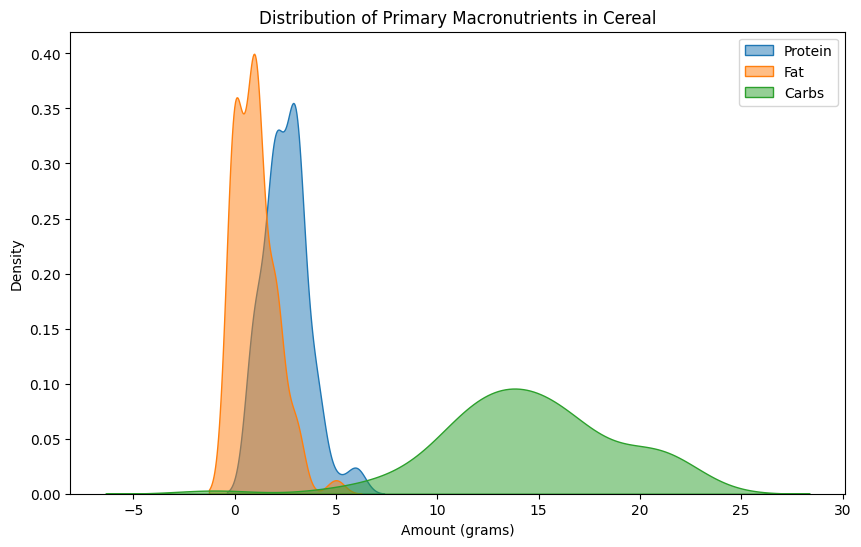

In [57]:
import seaborn as sb
import matplotlib.pyplot as plt

# Enter all of your code for exercise 1 here. Feel free to add more cells if you need to:
primary_macros = cereal[['protein', 'fat', 'carbo']]

plt.figure(figsize=(10,6))

sb.kdeplot(data=primary_macros['protein'], label='Protein', fill=True, alpha=0.5)
sb.kdeplot(data=primary_macros['fat'], label='Fat', fill=True, alpha=0.5)
sb.kdeplot(data=primary_macros['carbo'], label='Carbs', fill=True, alpha=0.5)

plt.xlabel('Amount (grams)')
plt.ylabel('Density')
plt.title('Distribution of Primary Macronutrients in Cereal')
plt.legend()

plt.show()



## Exercise 2: Sugar Daddy
Get a list of the top 5 most sugary cereals and the 5 least sugary cereals.

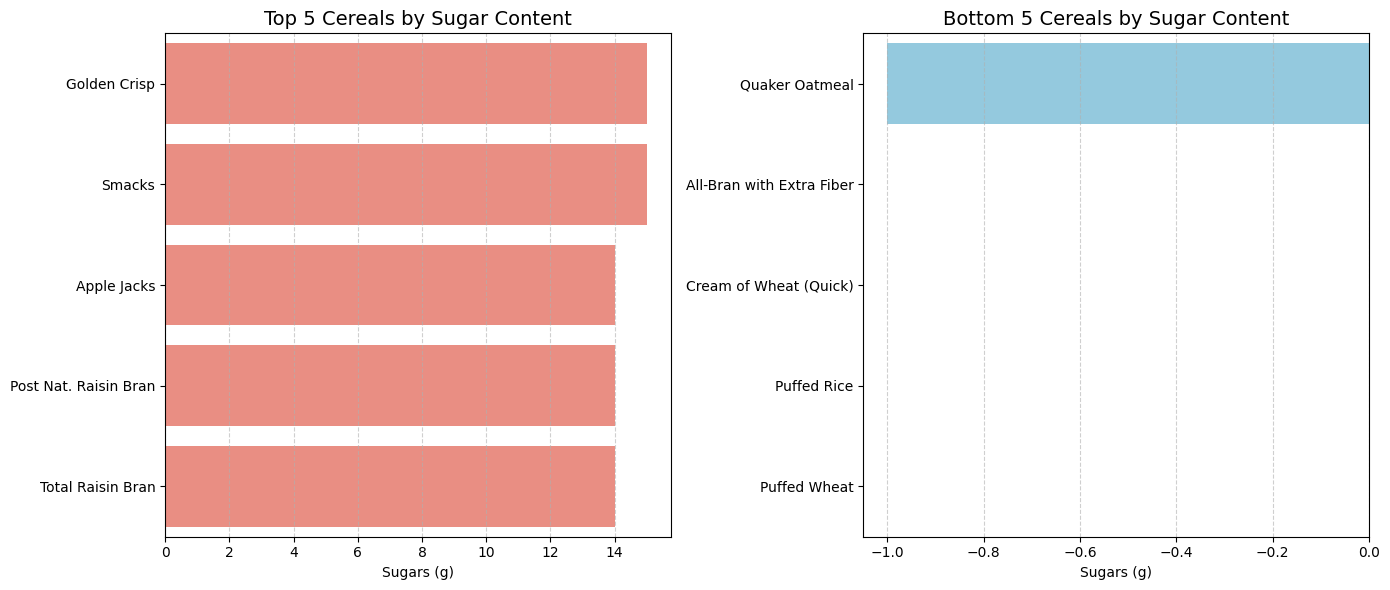

Top 5 Cereals by Sugar Content:
- Golden Crisp: 15g
- Smacks: 15g
- Apple Jacks: 14g
- Post Nat. Raisin Bran: 14g
- Total Raisin Bran: 14g

Bottom 5 Cereals by Sugar Content:
- Quaker Oatmeal: -1g
- All-Bran with Extra Fiber: 0g
- Cream of Wheat (Quick): 0g
- Puffed Rice: 0g
- Puffed Wheat: 0g


In [58]:
top_5 = cereal.nlargest(5, 'sugars')
bottom_5 = cereal.nsmallest(5, 'sugars').sort_values('sugars', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# red for high sugar.
sb.barplot(data=top_5, x='sugars', y='name', ax=axes[0], color="salmon")
axes[0].set_title('Top 5 Cereals by Sugar Content', fontsize=14)
axes[0].set_xlabel('Sugars (g)')
axes[0].set_ylabel('')
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# blue for low sugar
sb.barplot(data=bottom_5, x='sugars', y='name', ax=axes[1], color="skyblue")
axes[1].set_title('Bottom 5 Cereals by Sugar Content', fontsize=14)
axes[1].set_xlabel('Sugars (g)')
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("Top 5 Cereals by Sugar Content:")
for index, row in top_5.iterrows():
    print(f"- {row['name']}: {row['sugars']}g")

print("\nBottom 5 Cereals by Sugar Content:")
for index, row in bottom_5.iterrows():
    print(f"- {row['name']}: {row['sugars']}g")

## Exercise 3: Cereal Killer
Get a list of the top 5 highest rated and lowest rated cereals.

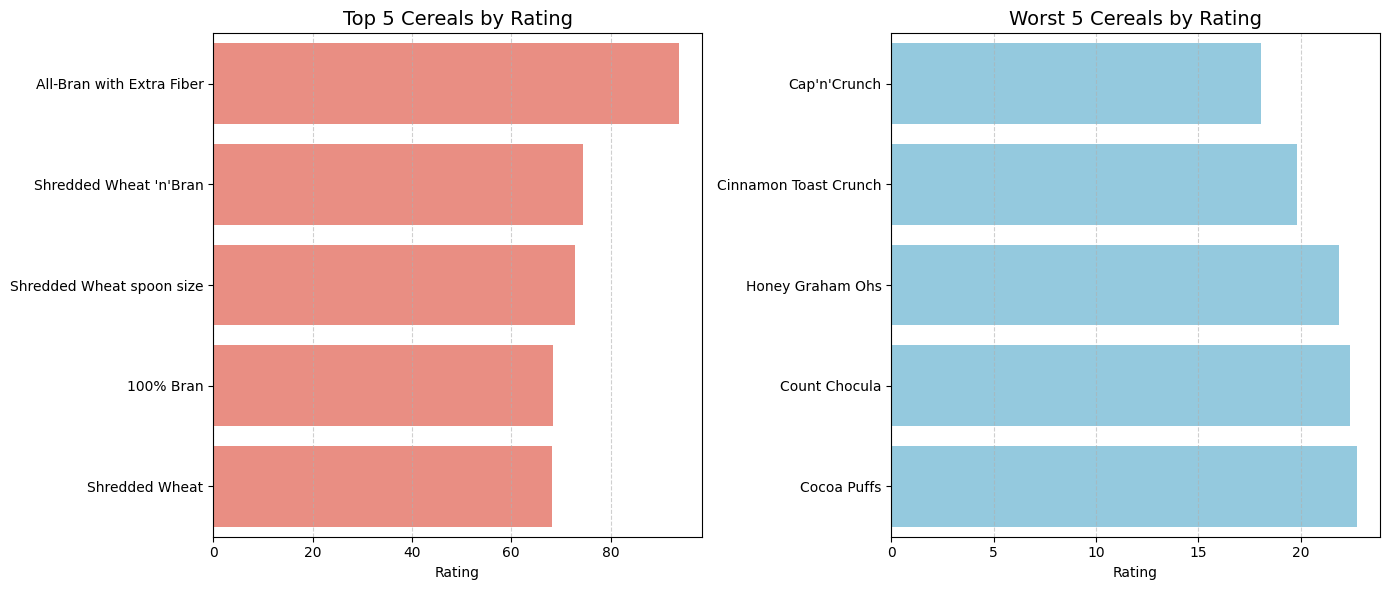

Top 5 Cereals by Rating:
- All-Bran with Extra Fiber: 93.704912
- Shredded Wheat 'n'Bran: 74.472949
- Shredded Wheat spoon size: 72.801787
- 100% Bran: 68.402973
- Shredded Wheat: 68.235885

Bottom 5 Cereals by Rating:
- Cap'n'Crunch: 18.042851
- Cinnamon Toast Crunch: 19.823573
- Honey Graham Ohs: 21.871292
- Count Chocula: 22.396513
- Cocoa Puffs: 22.736446


In [59]:
top_rated = cereal.nlargest(5, 'rating')
worst_rated = cereal.nsmallest(5, 'rating')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sb.barplot(data=top_rated, x='rating', y='name', ax=axes[0], color="salmon")
axes[0].set_title('Top 5 Cereals by Rating', fontsize=14)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('')
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

sb.barplot(data=worst_rated, x='rating', y='name', ax=axes[1], color="skyblue")
axes[1].set_title('Worst 5 Cereals by Rating', fontsize=14)
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("Top 5 Cereals by Rating:")
for index, row in top_rated.iterrows():
    print(f"- {row['name']}: {row['rating']}")

print("\nBottom 5 Cereals by Rating:")
for index, row in worst_rated.iterrows():
    print(f"- {row['name']}: {row['rating']}")

## Exercise 4: America
Quantify the relationship between sugar and ratings.

Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship. It may be helpful to look at the [seaborn regplot documentation]("https://seaborn.pydata.org/generated/seaborn.regplot.html").

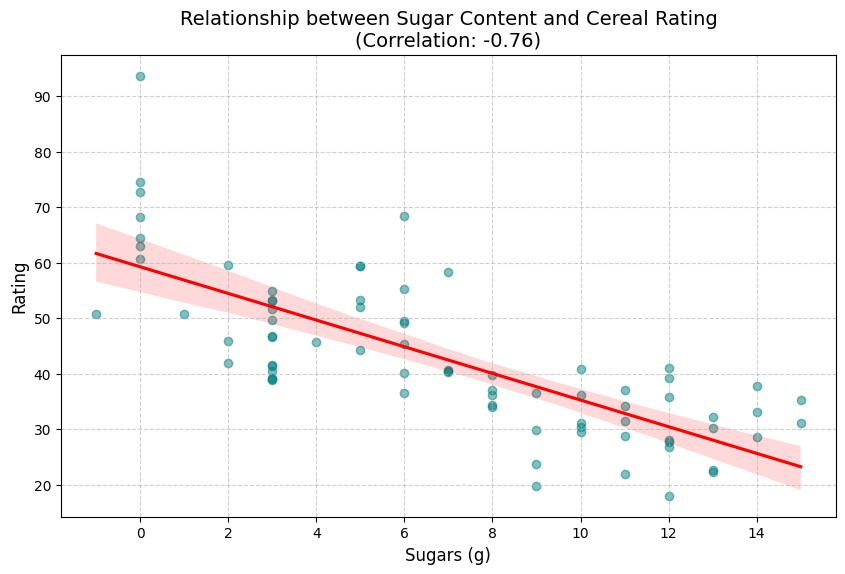

The correlation coefficient between sugar and rating is: -0.76


In [60]:
correlation = cereal['sugars'].corr(cereal['rating'])

plt.figure(figsize=(10, 6))
sb.regplot(data=cereal, x='sugars', y='rating',
            scatter_kws={'alpha':0.5, 'color':'teal'},
            line_kws={'color':'red'})

plt.title(f'Relationship between Sugar Content and Cereal Rating\n(Correlation: {correlation:.2f})', fontsize=14)
plt.xlabel('Sugars (g)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

print(f"The correlation coefficient between sugar and rating is: {correlation:.2f}")


Calculate a correlation statistic describing the relationship between sugar and ratings  (i.e., r or r squared).

In [61]:
correlation = cereal['sugars'].corr(cereal['rating'])
r_squared = correlation ** 2

print(f"The correlation coefficient between sugar and rating is: {correlation:.2f}")
print(f"R-squared: {r_squared:.2f}")

The correlation coefficient between sugar and rating is: -0.76
R-squared: 0.58


Write a statement in plain English interpreting this statistic.

**There is a strong negative relationship between amount of sugar and cereal ratings. Cereals with higher sugar levels are rated worse.**

## Exercise 5: America Part 2
Make five plots comparing the relationships of carbo, sugars, calories, protein, and fat with rating.

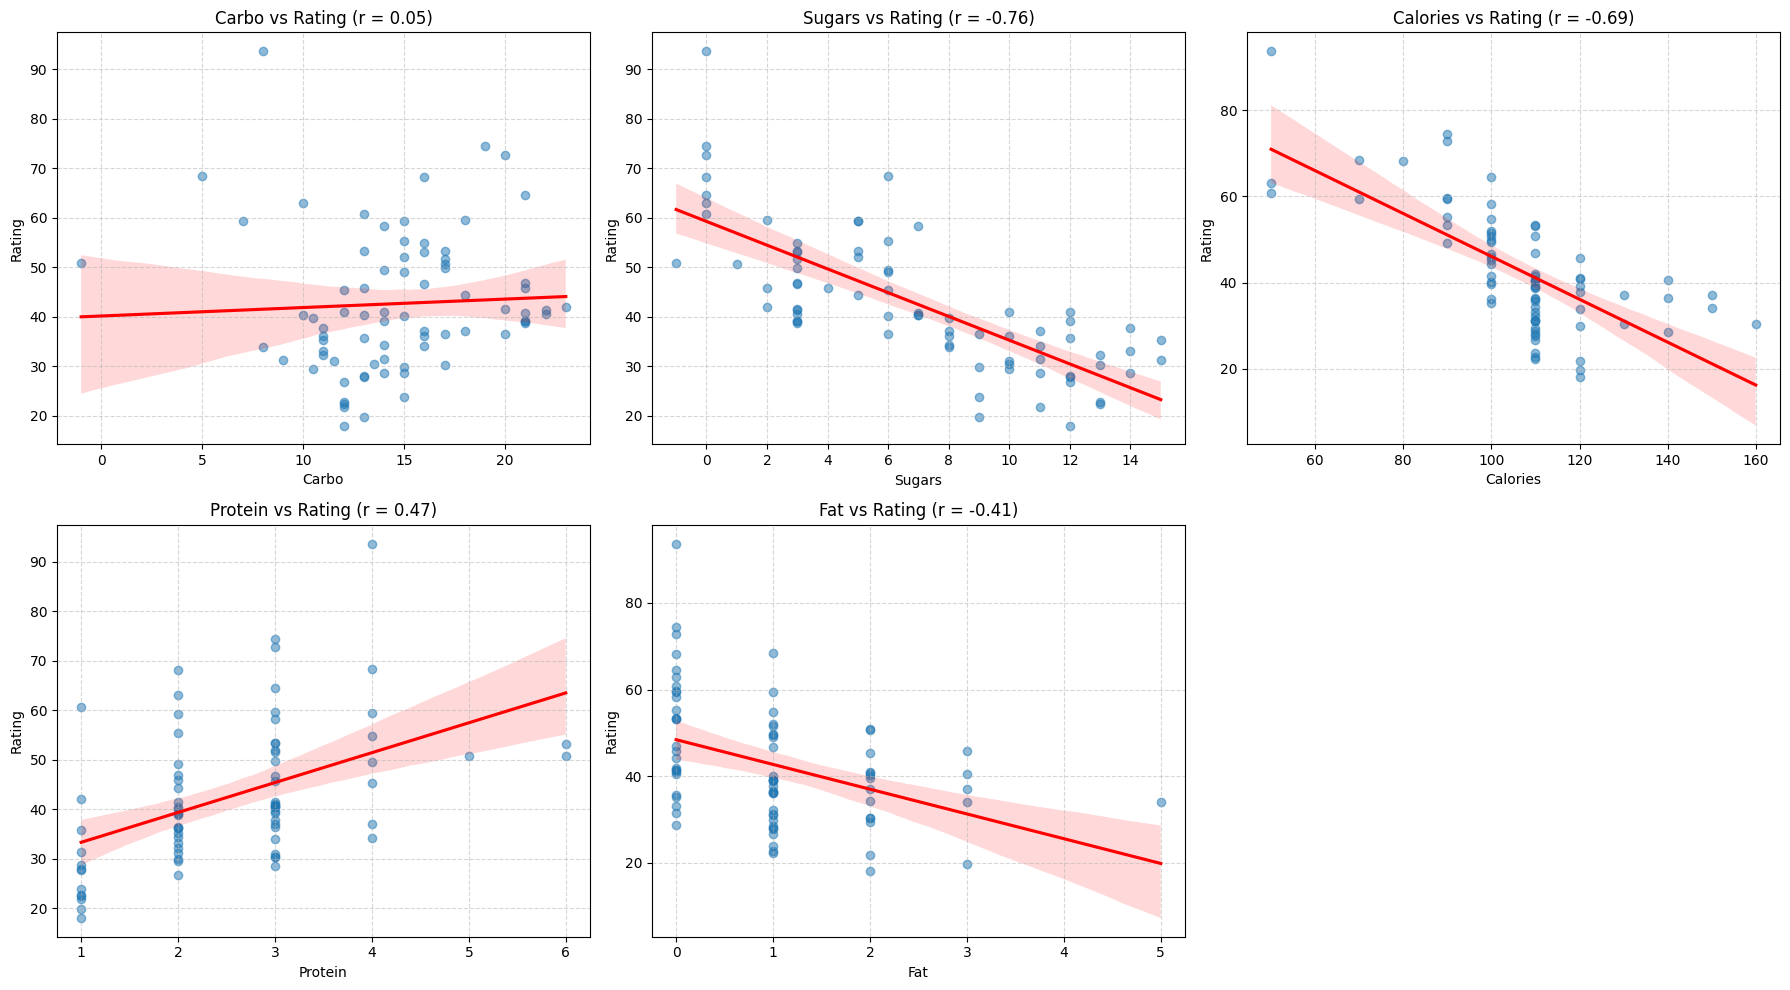

In [62]:
nutrients = ['carbo', 'sugars', 'calories', 'protein', 'fat']

plt.figure(figsize=(18, 10))

for i, var in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)
    correlation = cereal[var].corr(cereal['rating'])

    sb.regplot(
        data=cereal, x=var, y='rating',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    plt.title(f'{var.capitalize()} vs Rating (r = {correlation:.2f})')
    plt.xlabel(var.capitalize())
    plt.ylabel('Rating')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Of the variables carbo, sugars, calories, protein, and fat, which has the strongest relationship with rating? Justify your answer.

# Sugar = Strongest Relationship


1.   Sugar has the largest absolute value for `r = -0.76`
2.   When people look at nutrition labels, sugar is the often the first thing they judge.
3. Some cereals have low sugar while others are super high. This makes it impact on ratings very noticeable.



## Exercise 6: Preparing for Mt. Everest
Do the same as you did with exercise 5, but instead compare carbo, sugars, protein, and fat with calories.

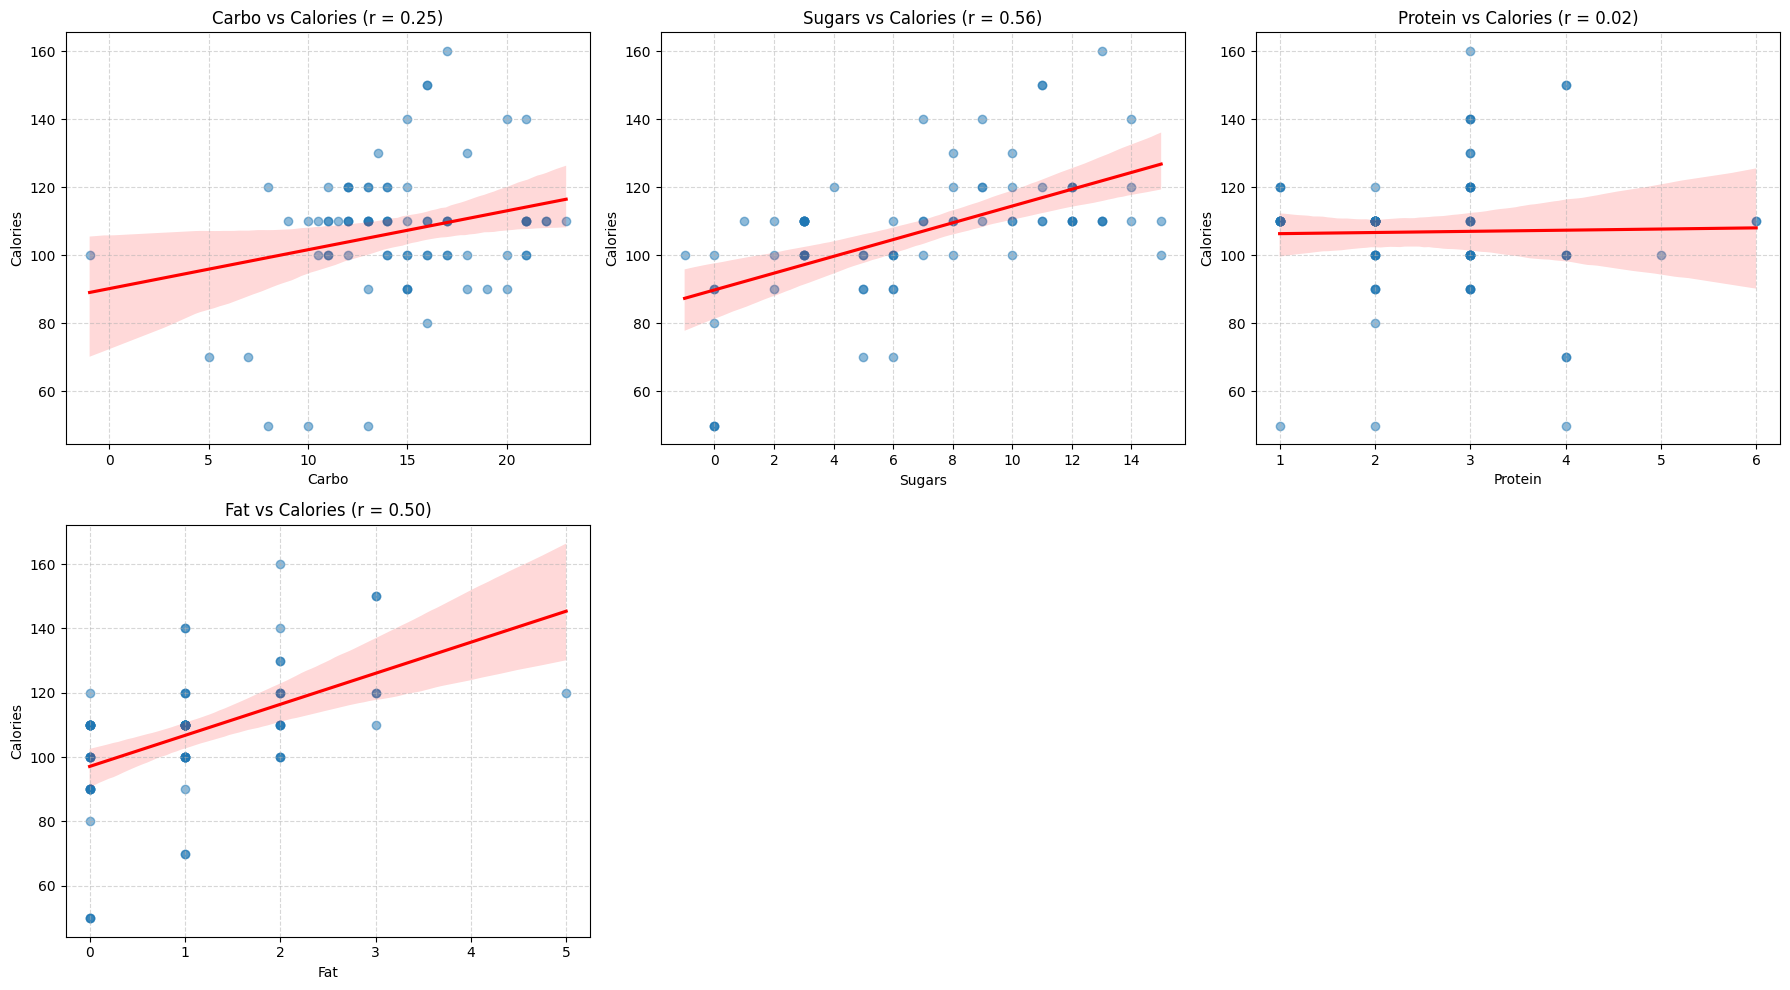

In [63]:
nutrients = ['carbo', 'sugars', 'protein', 'fat']

plt.figure(figsize=(18, 10))

for i, var in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)
    correlation = cereal[var].corr(cereal['calories'])

    sb.regplot(
        data=cereal, x=var, y='calories',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    plt.title(f'{var.capitalize()} vs Calories (r = {correlation:.2f})')
    plt.xlabel(var.capitalize())
    plt.ylabel('Calories')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Of the variables carbo, sugars, protein, and fat, which has the strongest relationship with calories? Justify your answer.

# Sugar is the Back-to-Back Champion

1. Sugar shows the strongest relationship with cereal ratings, with a correlation of r = 0.56.
This indicates a positive relationship, meaning that as sugar content increases, so do calories.

2. Just thinking logically, cereals high in sugar are often higher in calories overall.

## Exercise 7: It’s Hot and It's Cold
The type column has two values: H='hot' and C='cold'. What is the average rating of each type?

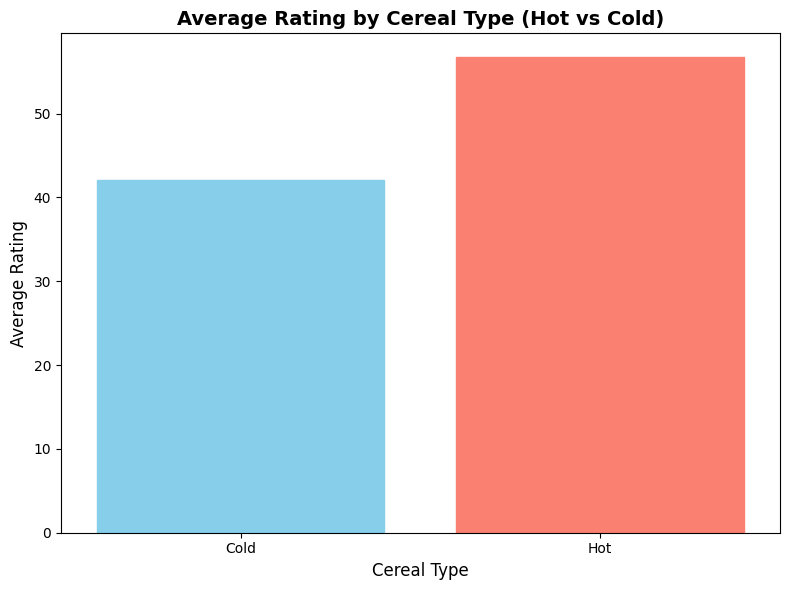

           mean  count
type                  
C     42.095218     74
H     56.737708      3


In [64]:
avg_ratings = cereal.groupby('type')['rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sb.barplot(data=avg_ratings, x='type', y='rating')

colors = ['skyblue', 'salmon']
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.xlabel('Cereal Type', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average Rating by Cereal Type (Hot vs Cold)', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Cold', 'Hot'])
plt.tight_layout()
plt.show()

# more detailed summary
type_ratings = cereal.groupby('type')['rating'].agg(['mean', 'count'])
print(type_ratings)

## Exercise 8: Captain Crunch the Numbers
Provide one additional insight from this dataset that you found interesting. Create at least one figure and explain why the figure was interesting to you.

In [76]:
shelf_counts = cereal['shelf'].value_counts().sort_index()
print(shelf_counts)

for shelf_num in sorted(cereal['shelf'].unique()):
    print(f"\n=== Shelf {shelf_num} ===")
    cereals_on_shelf = cereal[cereal['shelf'] == shelf_num]['name'].tolist()
    print(f"Count: {len(cereals_on_shelf)}")
    print(cereals_on_shelf[:10])

shelf
1    20
2    21
3    36
Name: count, dtype: int64

=== Shelf 1 ===
Count: 20
['Apple Cinnamon Cheerios', 'Bran Chex', 'Cheerios', 'Corn Chex', 'Corn Flakes', 'Frosted Flakes', 'Golden Crisp', 'Honey Nut Cheerios', 'Honey-comb', 'Multi-Grain Cheerios']

=== Shelf 2 ===
Count: 21
['Apple Jacks', "Cap'n'Crunch", 'Cinnamon Toast Crunch', 'Cocoa Puffs', 'Corn Pops', 'Count Chocula', 'Cream of Wheat (Quick)', 'Froot Loops', 'Frosted Mini-Wheats', 'Fruity Pebbles']

=== Shelf 3 ===
Count: 36
['100% Bran', '100% Natural Bran', 'All-Bran', 'All-Bran with Extra Fiber', 'Almond Delight', 'Basic 4', 'Bran Flakes', 'Clusters', "Cracklin' Oat Bran", 'Crispix']


Looking at the data, there's an interesting pattern:

**Shelf 1 (bottom)** has popular, mainstream cereals like Cheerios, Corn Flakes, and Frosted Flakes - these are classic, well-known brands. (lots of people like them)

**Shelf 2 (middle - eye level for kids)** FULL of sugary, colorful cereals marketed to children: Apple Jacks, Cap'n Crunch, Cocoa Puffs, Froot Loops, Count Chocula.

**Shelf 3 (top)** has the most cereals (36!) and they're almost all health-focused or "adult" cereals: 100% Bran, All-Bran, Almond Delight, and various high-fiber options. These are at adult eye level.

This makes marketing sense. Stores place kid-friendly cereals where kids can see them. Healthy cereals are positioned where adults naturally look.